<a href="https://colab.research.google.com/github/hawk-in-cloud/AI_LearningNotebook/blob/main/TargetF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
# 1. 安装依赖库（在Colab中运行需要加!）
!pip install torch torchvision opencv-python-headless matplotlib
!pip install git+https://github.com/facebookresearch/segment-anything.git

# 2. 下载预训练模型（以vit_b为例）
!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_b_01ec64.pth

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 123.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 51.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 99.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [6]:
# 3. 导入库
import cv2
import numpy as np
import matplotlib.pyplot as plt
from segment_anything import SamPredictor, sam_model_registry


In [7]:
# 4. 加载模型
sam = sam_model_registry["vit_b"](checkpoint="sam_vit_b_01ec64.pth")
predictor = SamPredictor(sam)


In [23]:
# 5. 上传测试图像到Colab（运行后点击上传按钮）

from google.colab import files
uploaded = files.upload()
image_path = next(iter(uploaded))  # 获取上传文件名

# 下载示例图像（小狗）
# !wget https://github.com/ADlead/Dogs-Cats/blob/master/data/test1/10030.jpg
# image_path = "10030.jpg"

Saving dog1.jpg to dog1.jpg


In [24]:
# 6. 读取并预处理图像
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # 转换为RGB格式
predictor.set_image(image)  # SAM需要先编码图像

In [25]:
# 7. 定义交互点（示例坐标，需要根据你的图像调整）
# 点击图片查看坐标，例如：小狗的鼻子位置可能是 (500, 300)
input_point = np.array([[370, 147]])  # 格式为[[x,y]]
input_label = np.array([1])  # 1=前景，0=背景

In [26]:
# 8. 生成分割掩码
masks, scores, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    multimask_output=True  # 输出3个候选掩码
)

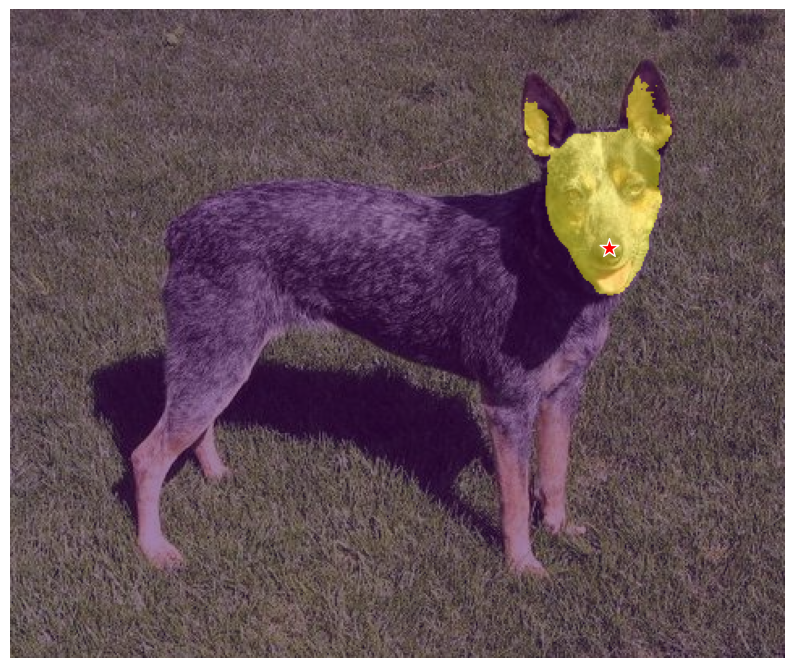

In [27]:
# 9. 可视化最佳结果
best_mask = masks[scores.argmax()]

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.scatter(input_point[:,0], input_point[:,1], color='red', marker='*', s=200, edgecolor='white')  # 显示点击位置
plt.imshow(best_mask, alpha=0.5)  # 半透明叠加掩码
plt.axis('off')
plt.show()